In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-classification-dataset-synthetic/README.md
/kaggle/input/fitness-classification-dataset-synthetic/fitness_dataset.csv
/kaggle/input/fitness-classification-dataset-synthetic/dataset-metadata.json


In [2]:
df = pd.read_csv("/kaggle/input/fitness-classification-dataset-synthetic/fitness_dataset.csv")
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


In [3]:

# this warning is for more number of null values present int the dataset



# lets check the  basic information about the dataset
print("\n==================================\n")
print("shape of our dataset is ",df.shape)
print("\n ================================\n")
print("information of each columns ",df.info())
print("\n ================================\n")
print("stats about numerical columns \n",df.describe())
print("\n ================================\n")
print("stats for non numerical columns \n",df.describe(include = "O"))
print("\n ================================\n")
print(" columns present in dataset \n",df.columns)




shape of our dataset is  (2000, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB
information of each columns  None


stats about numerical columns 
                age   height_cm    weight_kg   heart_rate  blood_pressure  \
count  2000.000000  2

In [4]:
#  lets check null values
print("percentage of null values present in data per column \n",df.isnull().mean()*100)


percentage of null values present in data per column 
 age                  0.0
height_cm            0.0
weight_kg            0.0
heart_rate           0.0
blood_pressure       0.0
sleep_hours          8.0
nutrition_quality    0.0
activity_index       0.0
smokes               0.0
gender               0.0
is_fit               0.0
dtype: float64


## FEATURE ENG.

In [5]:
# lets handel the missing values
# print(df.sleep_hours.unique)



# this shows that sleep hour is a numerical column 
# so WE CAN IMPUTE  VALUES WITH MEAN AND MEDIAN
# we use mean


#  lets calculate the variance 
print("variance before imputation ",df.sleep_hours.std())



df["sleep_hours"].fillna(df["sleep_hours"].mean(),inplace = True)
print("variance after imputation ",df.sleep_hours.std())

variance before imputation  1.5020312107660214
variance after imputation  1.440666390394102


/tmp/ipykernel_13/2345985831.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sleep_hours"].fillna(df["sleep_hours"].mean(),inplace = True)


In [6]:
#  some insights for categorical columns 

cat_col = []
for col in df.columns:
    if df[col].dtype == "object":
        cat_col.append(col)
print("nonnumerical(categorical) columns are ",cat_col)

# now lets understand these columns

for i in cat_col:
    print(f"values count for {i} is ")
    print(df[i].value_counts())
    print('\n\n')


#  here our is_fit is target feature which also as categorie
df["is_fit"].value_counts()

nonnumerical(categorical) columns are  ['smokes', 'gender']
values count for smokes is 
smokes
yes    711
0      581
no     518
1      190
Name: count, dtype: int64



values count for gender is 
gender
F    1030
M     970
Name: count, dtype: int64





is_fit
0    1201
1     799
Name: count, dtype: int64

In [7]:
# from this we learn that smoke has 4 categories which is a mistake
# it is either 0,1 or yes ,no
# so transfrom the smoke feature 0,1

# for smoke
df["smokes"] = df["smokes"].replace({"yes": 1, "no": 0})



# change the datatype

df["smokes"]=df["smokes"].astype(int)


print("datatype of smoke is",df.smokes.dtype)
print("values count for smoke after tranfrom ",df["smokes"].value_counts())



datatype of smoke is int64
values count for smoke after tranfrom  smokes
0    1099
1     901
Name: count, dtype: int64


In [8]:
# LETS DO ONEHOTENCODING/ DUMMY VARIABLE FOR GENDER AS IT IS A NOMINAL TYPE CATEGORY
df_final = pd.get_dummies(df,columns = ["gender"])
df_final.columns




Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'is_fit', 'gender_F', 'gender_M'],
      dtype='object')

## VISULIZATION

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# for visulization lets check the values distribution
for i in df.columns:
    print(df[i].value_counts())

age
43    48
79    45
68    44
50    43
64    42
      ..
58    24
44    24
60    23
30    22
63    21
Name: count, Length: 62, dtype: int64
height_cm
170    55
184    50
174    48
198    48
153    47
157    47
169    47
164    47
171    46
183    45
195    45
190    44
155    44
193    43
178    42
177    42
161    42
163    42
181    42
162    41
194    41
151    41
196    40
173    40
199    40
152    40
186    40
182    40
179    40
175    39
167    39
158    39
160    39
191    38
185    38
188    38
154    37
189    37
187    37
168    35
166    35
172    34
165    34
159    34
197    31
150    31
192    30
156    30
176    29
180    27
Name: count, dtype: int64
weight_kg
103    42
57     41
72     38
98     37
61     36
       ..
58     13
220    10
200     7
30      5
250     4
Name: count, Length: 80, dtype: int64
heart_rate
45.0    25
59.2    12
72.0    12
72.8    11
68.5    11
        ..
96.6     1
93.6     1
59.9     1
97.7     1
55.3     1
Name: count, Length: 484, dtype: 

In [11]:
# lets divide the columns in various category for faster visulization
cat_col = ["smokes","gender"] 
count_col = ["age","height_cm"]
other_col = df.drop(columns = ["smokes","gender","age","height_cm","is_fit"])


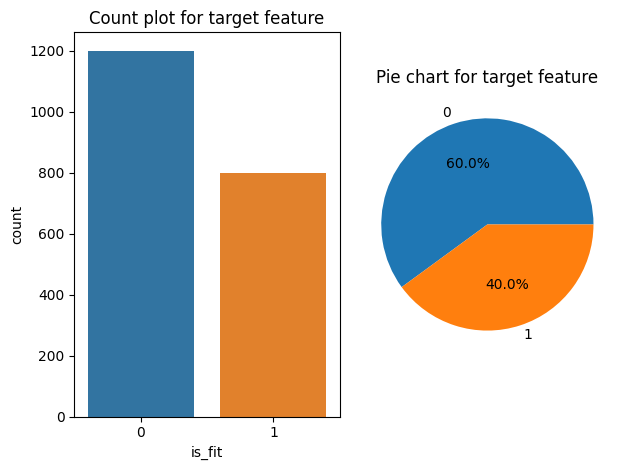

In [12]:
# count plot for is_fit
fig, ax = plt.subplots(1, 2)
# Countplot (Seaborn)
sns.countplot(x="is_fit", data=df, ax=ax[0])
ax[0].set_title("Count plot for target feature")

# Pie chart (Matplotlib)
counts = df["is_fit"].value_counts()
ax[1].pie(counts, labels=counts.index, autopct="%1.1f%%")
ax[1].set_title("Pie chart for target feature")

plt.tight_layout()
plt.show()

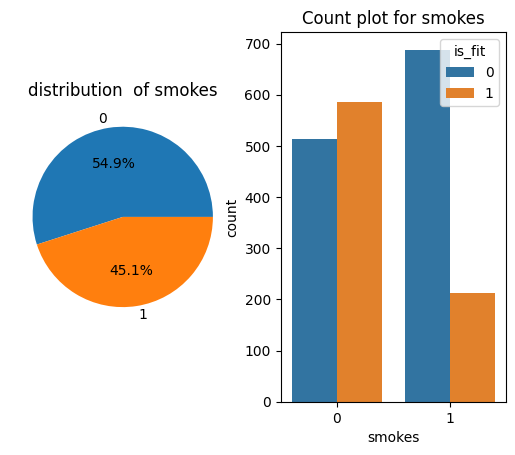

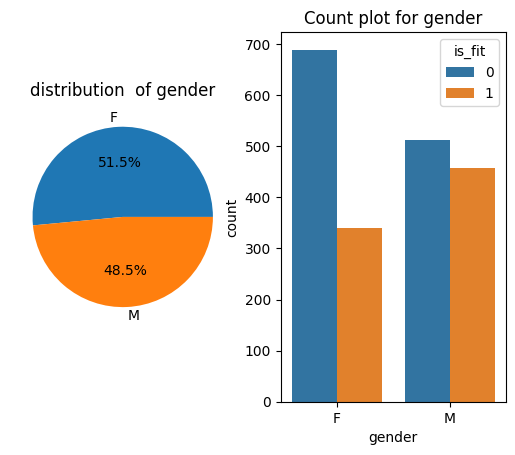

In [13]:
#  smilarlry for cat_col
cat_col
for i in cat_col:
    fig,ax = plt.subplots(1,2)
    
    
    
    # PIE CHART FOR CATEGORY DISTRIBUTION
    counts = df[i].value_counts()
    ax[0].pie(counts, labels=counts.index, autopct="%1.1f%%")
    ax[0].set_title("distribution  of "+i)

    #  count plot with repect to is_fit
    sns.countplot(x=i, data=df, ax=ax[1],hue = "is_fit")
    ax[1].set_title("Count plot for "+i)
    plt.show()
    
    



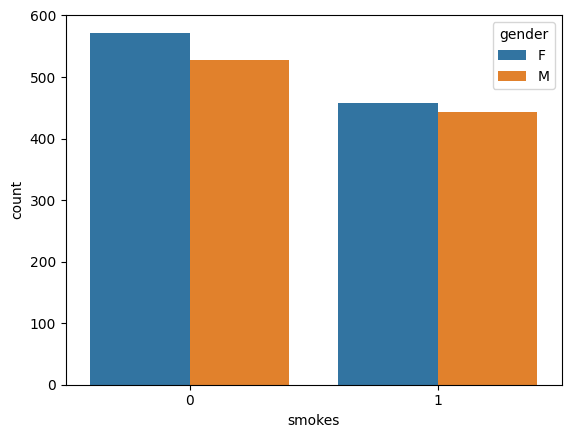

In [14]:
#  visulization for smoke with respect to gender
sns.countplot(x= "smokes",data=df,hue="gender")
plt.show()

In [15]:
#OBSERVATION :-   we found that FEMALE smokes MORE 

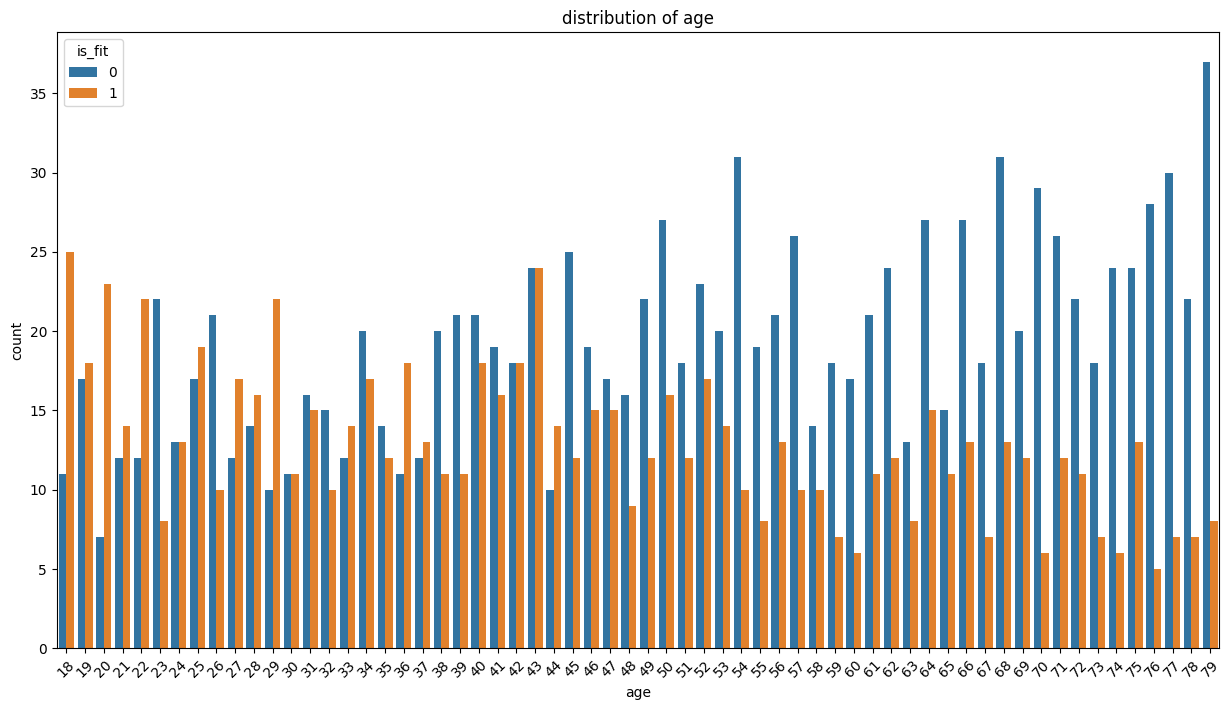

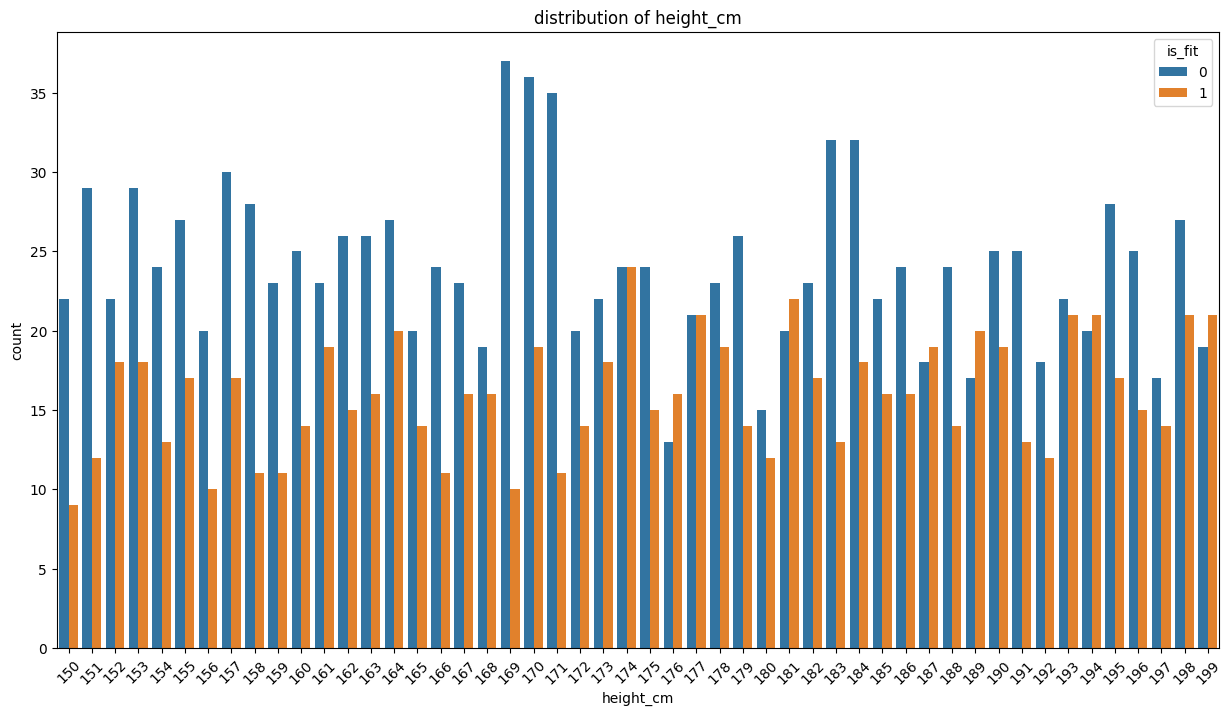

In [16]:
# COUNT PLOT 
for i in count_col:
    plt.figure(figsize=(15,8))
    sns.countplot(x = i,data=df,hue = "is_fit")
    plt.title("distribution of "+i)
    plt.xticks(rotation = 45)
    plt.show()

In [17]:
# OBSERVATION
#  here we observe that with increase in age the fitsness count started decresing

#HEIGHT 165 -170 ARE LESS FIT 

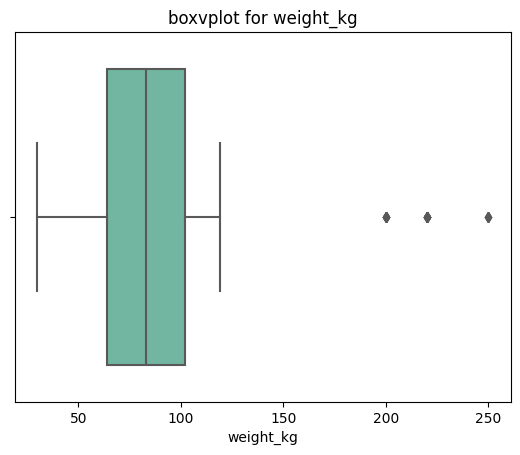

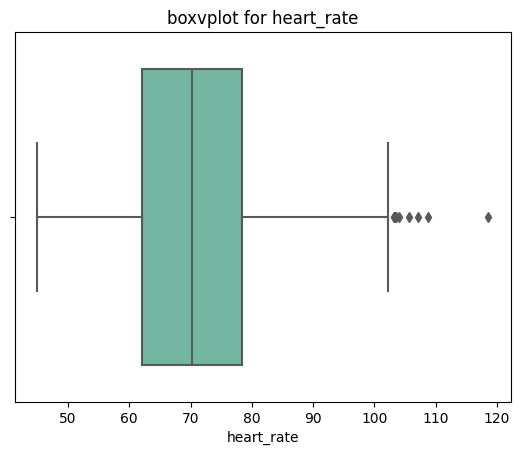

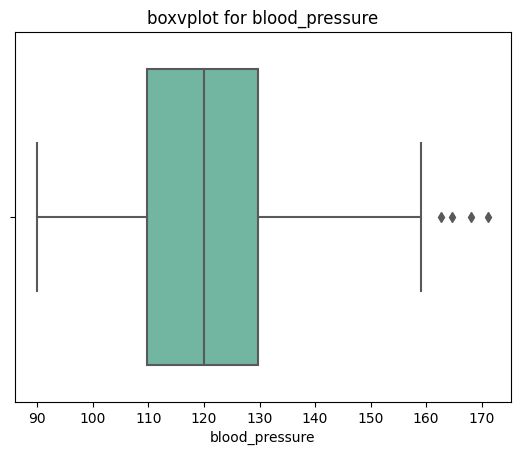

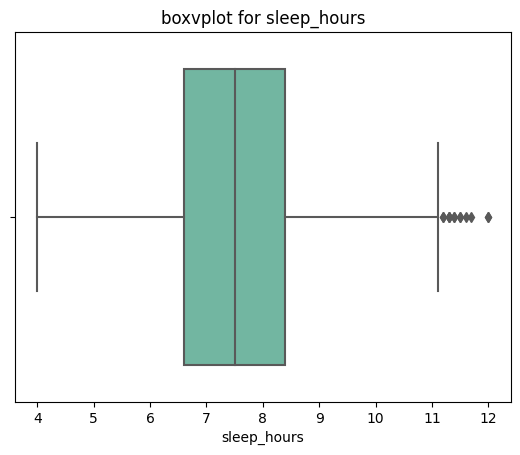

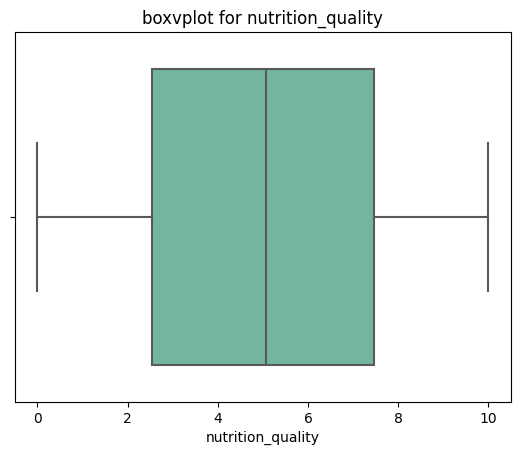

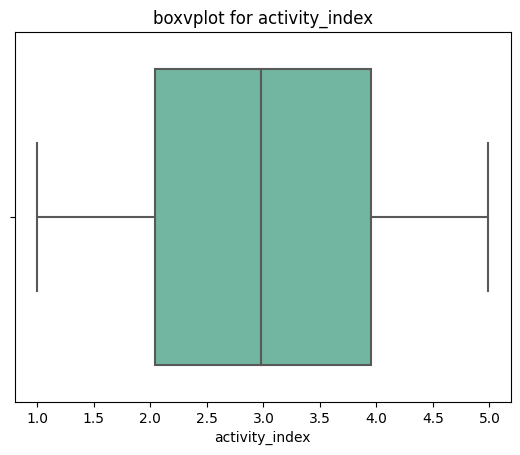

In [18]:
# FOR OTHER_COL
for i in other_col:
    sns.boxplot(x=i, data=df, palette="Set2")
    plt.title(f"boxvplot for {i}")
    plt.show()

In [19]:
# OBSERVATION :
# WE OBSERVE THAT MANY FEATURES HAVE OUTLIER WHICH MAY DECERSE THE STRENGTH OF OUR MODEL 
#  SO TRIM/CAP THESE OUTLIER
out_col = ["weight_kg","heart_rate","blood_pressure","sleep_hours"]

In [20]:
# WE USE CAPPING AS THESE DATAPOINTS ARE CRUCIEL

out_col = ["weight_kg","heart_rate","blood_pressure","sleep_hours"]
for col in out_col:
    lower_cap = df[col].quantile(0.01)
    upper_cap = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)



In [21]:
# WE ALSO HAVE TO UPDATE IN OUR df_final FOR BETTER MODELLING
out_col = ["weight_kg","heart_rate","blood_pressure","sleep_hours"]
for col in out_col:
    lower_cap = df_final[col].quantile(0.01)
    upper_cap = df_final[col].quantile(0.99)
    df_final[col] = df_final[col].clip(lower=lower_cap, upper=upper_cap)

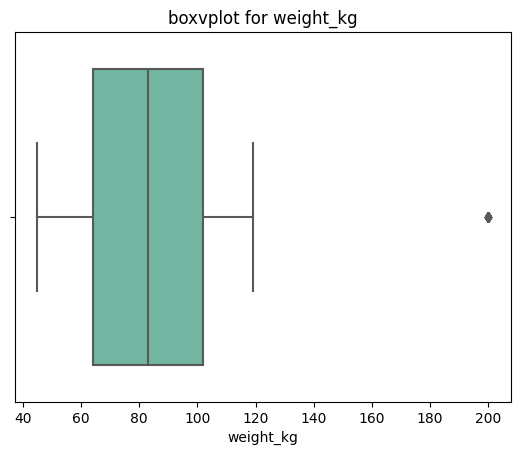

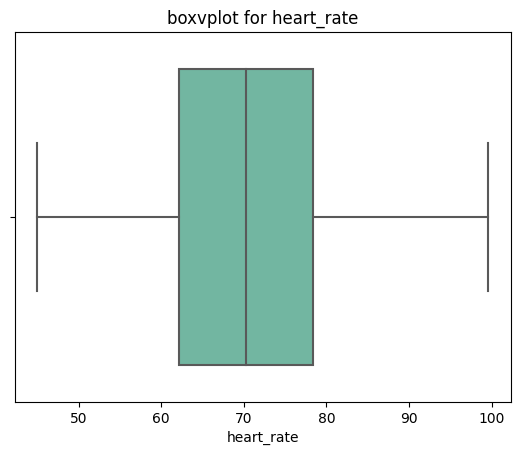

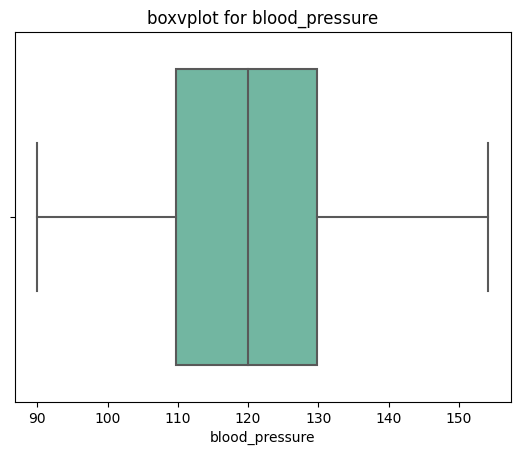

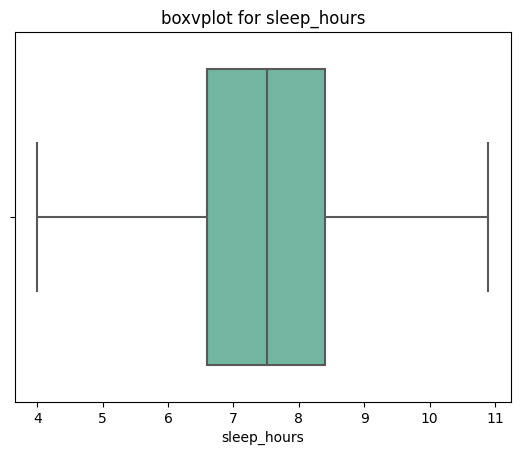

In [22]:
# boxplot after capping
for i in out_col:
    sns.boxplot(x=i, data=df, palette="Set2")
    plt.title(f"boxvplot for {i}")
    plt.show()

In [23]:
print(df["weight_kg"].max())                     # actual max
print(df["weight_kg"].quantile(0.99))           # 99th percentile


200
200.0


In [24]:
# OBSERVATION
# WE DONNOT CAP WEIGHT = 200 BECAUSE THIS WEIGHT IS IMPORTANT AND MANY CASE HAVE THIS VALUE OF WEIGHT

## MODELLING

In [25]:
#  WE CHECK EVERY MODEL FOT THIS CLASSFICATION
# we use our df_final BECAUSE WE PERFROM FEATURE ENG AND GET OUR FINAL OUTPUT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
xtrain,xtest,ytrain,ytest = train_test_split(df_final.drop(columns = "is_fit"),df["is_fit"],test_size = 0.2,random_state = 1)
scaler = StandardScaler()
xtrainsc = scaler.fit_transform(xtrain)
xtestsc = scaler.transform(xtest)

In [26]:
# calling our model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
logr = LogisticRegression(n_jobs = -1)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_jobs = -1)
adboost =AdaBoostClassifier()
bag = BaggingClassifier(n_jobs = -1)
vote = VotingClassifier(estimators = [
    ("logr", LogisticRegression(max_iter=1000)),
    ("tree", DecisionTreeClassifier()),
    ("knn", KNeighborsClassifier())
])
knn = KNeighborsClassifier(n_jobs = -1)

In [27]:
# lets start train our model
logr.fit(xtrainsc,ytrain)
tree.fit(xtrainsc,ytrain)
forest.fit(xtrainsc,ytrain)
adboost.fit(xtrainsc,ytrain)
bag.fit(xtrainsc,ytrain)
vote.fit(xtrainsc,ytrain)
knn.fit(xtrainsc,ytrain)


KNeighborsClassifier(n_jobs=-1)

In [28]:
# lets calculate the accuracy
# we use accracy score as our data is not unbalanced
from sklearn.metrics import accuracy_score

models = [logr, tree, forest, adboost, bag, vote, knn]
for i in models :
    print(f"accuracy score for { i } is ",accuracy_score(ytest,i.predict(xtestsc)))
    


accuracy score for LogisticRegression(n_jobs=-1) is  0.8125
accuracy score for DecisionTreeClassifier() is  0.68
accuracy score for RandomForestClassifier(n_jobs=-1) is  0.79
accuracy score for AdaBoostClassifier() is  0.75
accuracy score for BaggingClassifier(n_jobs=-1) is  0.77
accuracy score for VotingClassifier(estimators=[('logr', LogisticRegression(max_iter=1000)),
                             ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())]) is  0.7975
accuracy score for KNeighborsClassifier(n_jobs=-1) is  0.765


In [29]:
# OBSERVATION 
# LOGISTIC REGRESION PERFORM BEST IN NORMAL TUNNING AND ATTENS ACCURACY SCORE OF 0.81

## MODEL TUNNING


In [30]:
from sklearn.model_selection import GridSearchCV
#                          FOR        ================= RANDOM FOREST =====================================

paramgrid = {
    "n_estimators" : [20,50,70,100,200,500,1000],
    "max_depth" :[2,5,10,15,],
    "oob_score":[True,False]
    
}
grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid =paramgrid,cv=3,n_jobs =-1)
grid.fit(xtrainsc,ytrain)

print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


{'max_depth': 5, 'n_estimators': 50, 'oob_score': True}
0.7718857525653909


In [31]:
forest_tun = RandomForestClassifier(max_depth=5,n_estimators=70,oob_score=True)
forest_tun.fit(xtrainsc,ytrain)

RandomForestClassifier(max_depth=5, n_estimators=70, oob_score=True)

In [32]:
# for        ==========================ADABOOST=============================


paramgrid = {
    "n_estimators" : [100,200,500,1000],
    "learning_rate":[1.0,0.1,0.01]
    
    
}
grid_adaboost = GridSearchCV(estimator = AdaBoostClassifier(random_state =1),param_grid = paramgrid,cv = 3,n_jobs=-1)
grid_adaboost.fit(xtrainsc,ytrain)

print(grid_adaboost.best_params_)
print(grid_adaboost.best_score_)

{'learning_rate': 0.1, 'n_estimators': 200}
0.7837552964985138


In [33]:
adaboost_tun = AdaBoostClassifier(learning_rate = 0.1,n_estimators = 200)
adaboost_tun.fit(xtrainsc,ytrain)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [34]:
#                       ==================== FOR BAGGING ===========================


paramgrid = {
    "n_estimators" : [100,200,500,1000],
    "bootstrap":[True,False],
    
    
}
grid_bag = GridSearchCV(estimator = BaggingClassifier(random_state=1),param_grid =paramgrid,cv=3,n_jobs=-1)
grid_bag.fit(xtrainsc,ytrain)
print(grid_bag.best_params_)
print(grid_bag.best_score_)

{'bootstrap': True, 'n_estimators': 1000}
0.7587478597344314


In [35]:
bag_tun = BaggingClassifier(bootstrap = True,n_estimators=1000)
bag_tun.fit(xtrainsc,ytrain)

BaggingClassifier(n_estimators=1000)

In [36]:
#              ============================for DESCISION TREE ==============================
paramgrid = {
    "criterion":["gini","entropy"] , 
    "max_depth":[2,4,3,5,1],
    
    
    
}
grid_tre = GridSearchCV(estimator = DecisionTreeClassifier(random_state=1),param_grid =paramgrid,cv=3,n_jobs=-1)
grid_tre.fit(xtrainsc,ytrain)
print(grid_tre.best_params_)
print(grid_tre.best_score_)



{'criterion': 'gini', 'max_depth': 2}
0.7175071966795726


In [37]:
tre_tun = DecisionTreeClassifier(criterion='gini',max_depth=2)
tre_tun.fit(xtrainsc,ytrain)

DecisionTreeClassifier(max_depth=2)

## COMPARISON OF MODELS


In [38]:
from sklearn.metrics import accuracy_score

models = [logr, tree,tre_tun, forest,forest_tun, adboost,adaboost_tun, bag,bag_tun, vote, knn]
for i in models :
    print(f"accuracy score for { i } is ",accuracy_score(ytest,i.predict(xtestsc)))
    print("===================")

accuracy score for LogisticRegression(n_jobs=-1) is  0.8125
accuracy score for DecisionTreeClassifier() is  0.68
accuracy score for DecisionTreeClassifier(max_depth=2) is  0.705
accuracy score for RandomForestClassifier(n_jobs=-1) is  0.79
accuracy score for RandomForestClassifier(max_depth=5, n_estimators=70, oob_score=True) is  0.7875
accuracy score for AdaBoostClassifier() is  0.75
accuracy score for AdaBoostClassifier(learning_rate=0.1, n_estimators=200) is  0.795
accuracy score for BaggingClassifier(n_jobs=-1) is  0.77
accuracy score for BaggingClassifier(n_estimators=1000) is  0.78
accuracy score for VotingClassifier(estimators=[('logr', LogisticRegression(max_iter=1000)),
                             ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())]) is  0.7975
accuracy score for KNeighborsClassifier(n_jobs=-1) is  0.765


1. Best Accuracy:

   * Logistic Regression achieved the highest accuracy: 0.8125

   * This suggests your dataset is linearly separable to a good extent, and simple models perform very well.

2. Tree-Based Models:

   * Single Decision Tree is much lower (0.7125–0.705) → prone to overfitting or underfitting depending on depth.
 
    * Random Forest improves significantly (0.7925) → ensemble helps reduce variance.

    * Tuning (max_depth=5, n_estimators=70) slightly decreased accuracy (0.7775) → sometimes tuning too aggressively can  reduce performance.

3. Boosting:

        AdaBoost improves over a single tree (0.75 → 0.795) → combining weak learners helps.

4. Bagging:

        Bagging with more estimators (1000) improves accuracy (0.7925) → more learners stabilize predictions.

5. Voting Classifier:

        Combines Logistic Regression, Tree, k-NN → 0.7975, slightly less than Logistic Regression alone.

        Indicates Logistic Regression dominates performance here.

6. k-NN:

        Accuracy (0.765) is decent but lower than Logistic Regression → distance-based model works okay but not the best